In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.Gender = df.Gender.replace(['Female', 'Male'], [0, 1])

In [4]:
df.head(10)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
5,1,67.253016,152.212156
6,1,68.785081,183.927889
7,1,68.348516,167.971111
8,1,67.018950,175.929440
9,1,63.456494,156.399676


In [5]:
X = df.drop('Gender', axis=1)
y = df['Gender']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [7]:
X_train.head()

,Height,Weight
1277,72.385301,189.165592
5361,60.960147,124.876796
5728,69.119292,168.864403
4276,68.271050,172.941248
3112,64.991405,144.551044


In [8]:
y_train.head()

1277    1
5361    0
5728    0
4276    1
3112    1
Name: Gender, dtype: int64

# KNN Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
knn_c = KNeighborsClassifier()

In [11]:
knn_c.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
pred = knn_c.predict(X_test)

In [13]:
pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [14]:
y_test

7154    0
3258    1
2188    1
5609    0
3186    1
       ..
8004    0
7644    0
8521    0
957     1
233     1
Name: Gender, Length: 2567, dtype: int64

In [15]:
accuracy = knn_c.score(X_test,y_test)
accuracy

0.9146864043630697

In [16]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1055
           1       0.92      0.93      0.93      1512

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [18]:
confusion_matrix(y_test,pred)

array([[ 938,  117],
       [ 102, 1410]], dtype=int64)

In [19]:
cm = confusion_matrix(y_test,pred)

<AxesSubplot:>

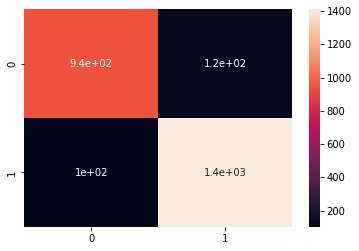

In [20]:
sns.heatmap(cm,annot=True)

In [21]:
tp , fn, fp,tn = confusion_matrix(y_test,pred).reshape(-1)

In [22]:
tp

938

In [23]:
fn

117

In [24]:
fp

102

In [25]:
tn

1410

In [26]:
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,938,117,1055
1,102,1410,1512
All,1040,1527,2567


In [27]:
pred_prob = knn_c.predict_proba(X_test)[:,1]

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
roc_auc = auc(fpr, tpr)

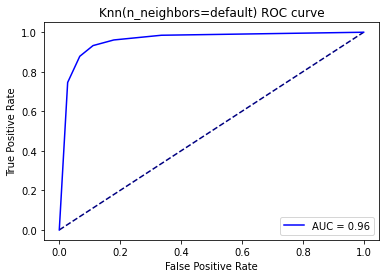

In [30]:
plt.plot([0,1], [0,1], color="navy", linestyle="--")
plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=default) ROC curve')
plt.legend(loc = 'lower right')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
ran = RandomForestClassifier(n_estimators=10)

In [35]:
ran.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [36]:
ran.score(X_test,y_test)

0.9080638878067784

In [37]:
prd_ran = ran.predict(X_test)

In [59]:
prd_ran

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [39]:
accuracy = accuracy_score(y_test, prd_ran)
accuracy

0.9080638878067784

In [44]:
import numpy as np

In [45]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 15)]

max_features = ['auto', 'sqrt','log2']

max_depth = [2,3,4,5,6,7,8,9,10,11,12]

min_samples_split = [2,3,4,5,6,7,8,9,10,11,12]

min_samples_leaf = [2,3,4,5,6,7,8,9,10,11,12]

# Create ids
grids = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(grids)

{'n_estimators': [50, 60, 71, 82, 92, 103, 114, 125, 135, 146, 157, 167, 178, 189, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'criterion': ['entropy', 'gini']}


In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
rnf = RandomForestClassifier()

In [48]:
rmcv = RandomizedSearchCV(estimator=rnf, param_distributions=grids, n_iter=100, cv=5)

In [49]:
rmcv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11,
                                                              12],
                                        'n_estimators': [50, 60, 71, 82, 92,
                                                         103, 114, 125, 135,
                                 

In [50]:
rmcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11,
                                                              12],
                                        'n_estimators': [50, 60, 71, 82, 92,
                                                         103, 114, 125, 135,
                                 

In [51]:
rmcv.best_params_

{'n_estimators': 178,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'gini'}

In [52]:
result = pd.DataFrame(rmcv.cv_results_)

In [53]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.751055,0.039489,0.044207,0.004169,157,4,11,log2,12,gini,"{'n_estimators': 157, 'min_samples_split': 4, ...",0.907346,0.912354,0.912354,0.911445,0.926483,0.913996,0.006512,41
1,0.523638,0.023372,0.032003,0.001897,135,3,8,log2,5,gini,"{'n_estimators': 135, 'min_samples_split': 3, ...",0.902337,0.914023,0.911519,0.908939,0.929825,0.913329,0.009121,58
2,0.774457,0.033384,0.043003,0.003899,178,10,2,sqrt,7,gini,"{'n_estimators': 178, 'min_samples_split': 10,...",0.909015,0.913189,0.913189,0.912281,0.929825,0.915500,0.007325,1
3,0.367627,0.008569,0.021202,0.000980,82,3,7,auto,7,gini,"{'n_estimators': 82, 'min_samples_split': 3, '...",0.907346,0.914858,0.914023,0.910610,0.927318,0.914831,0.006789,12
4,1.201094,0.052983,0.050404,0.003383,189,4,3,auto,9,entropy,"{'n_estimators': 189, 'min_samples_split': 4, ...",0.904841,0.910684,0.912354,0.910610,0.928989,0.913496,0.008154,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.316023,0.009529,0.023203,0.004957,92,9,7,auto,3,gini,"{'n_estimators': 92, 'min_samples_split': 9, '...",0.894825,0.906511,0.913189,0.908939,0.929825,0.910658,0.011354,81
96,0.751121,0.047227,0.040402,0.003979,146,5,5,log2,11,gini,"{'n_estimators': 146, 'min_samples_split': 5, ...",0.909015,0.914023,0.914023,0.909774,0.923977,0.914163,0.005331,39
97,0.901867,0.045878,0.050604,0.006153,178,8,7,sqrt,8,gini,"{'n_estimators': 178, 'min_samples_split': 8, ...",0.907346,0.911519,0.914023,0.912281,0.927318,0.914497,0.006775,22
98,0.373028,0.015685,0.025601,0.001855,125,9,9,auto,2,gini,"{'n_estimators': 125, 'min_samples_split': 9, ...",0.883973,0.901503,0.898164,0.901420,0.921470,0.901306,0.011975,99


In [54]:
rmcv.best_score_

0.9154995167384236

In [55]:
rmcv.best_params_

{'n_estimators': 178,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'gini'}

In [56]:
random_forest = rmcv.best_estimator_

In [57]:
random_forest

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=178)

In [58]:
random_forest.score(X_test,y_test)

0.9236462797039345